# Data Wrangling
## Análisis de Calidad de Datos
Equipo: Comando Estelar

#### Instalación de paquetes necesarios

In [16]:
%pip install Pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install  dython

Note: you may need to restart the kernel to use updated packages.


#### Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from ydata_profiling import ProfileReport
from dython.nominal import associations
import scipy.stats as stats

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importación de archivos

In [2]:
df = pd.read_csv('iar_Reservaciones.csv')


/var/folders/by/zjps0pld1k3grf79nwzwkw440000gn/T/ipykernel_45991/2627998811.py:1: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iar_Reservaciones.csv')


In [3]:
df.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16,20190816,2019-08-16,2019-08-16,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10
1,1,2019-10-22,20191022,2019-10-22,2019-10-22,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05
2,2,2019-10-28,20191028,2019-10-28,2019-10-28,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05
3,3,2019-10-28,20191028,2019-10-28,2019-10-28,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11
4,4,2019-10-28,20191028,2019-10-28,2019-10-28,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Reserva                203002 non-null  int64  
 1   Fecha_hoy                 203002 non-null  object 
 2   h_res_fec                 203002 non-null  int64  
 3   h_res_fec_ok              203002 non-null  object 
 4   h_res_fec_okt             203002 non-null  object 
 5   h_num_per                 203002 non-null  int64  
 6   aa_h_num_per              203002 non-null  int64  
 7   h_num_adu                 203002 non-null  int64  
 8   aa_h_num_adu              203002 non-null  int64  
 9   h_num_men                 203002 non-null  int64  
 10  aa_h_num_men              203002 non-null  int64  
 11  h_num_noc                 203002 non-null  int64  
 12  aa_h_num_noc              203002 non-null  int64  
 13  h_tot_hab                 203002 non-null  i

In [5]:
df.describe()

,ID_Reserva,h_res_fec,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,...,Cliente_Disp,aa_Cliente_Disp,Reservacion,aa_Reservacion,ID_estatus_reservaciones,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve
count,203002.00000,2.030020e+05,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,...,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,0.0,0.0,2.030020e+05,2.030020e+05,203002.0
mean,101500.50000,2.019291e+07,1.185865,1.170550,1.094708,1.079694,0.034108,0.033734,1.680028,1.656043,...,1.094708,1.079694,0.503438,0.496562,6.733407,NaN,NaN,4.106728e+03,4.039369e+03,1.0
std,58601.77401,4.109583e+03,1.369629,1.368073,1.207076,1.204694,0.265187,0.264043,2.866189,2.847958,...,1.207076,1.204694,0.499989,0.499989,3.193774,NaN,NaN,6.501707e+03,6.443027e+03,0.0
min,0.00000,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,-3.091000e+04,-3.091000e+04,1.0
25%,50750.25000,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,0.000000e+00,0.000000e+00,1.0
50%,101500.50000,2.019072e+07,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,9.000000,NaN,NaN,0.000000e+00,0.000000e+00,1.0
75%,152250.75000,2.019123e+07,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,9.000000,NaN,NaN,7.592000e+03,7.494000e+03,1.0
max,203001.00000,2.020043e+07,32.000000,32.000000,15.000000,15.000000,15.000000,15.000000,687.000000,687.000000,...,15.000000,15.000000,1.000000,1.000000,9.000000,NaN,NaN,1.033056e+06,1.033056e+06,1.0


In [6]:
df.shape

(203002, 49)

## Pandas Data Profiling
Aplicamos esta herramienta de Pandas antes de realizar el análisis

In [32]:
profile_report = ProfileReport(df, title="Profiling Report")
profile_report.to_file("Profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 21.21it/s]


## Identificación de Variables

## Validadción de Datos :Tipos de Datos

In [7]:
df.dtypes

ID_Reserva                    int64
Fecha_hoy                    object
h_res_fec                     int64
h_res_fec_ok                 object
h_res_fec_okt                object
h_num_per                     int64
aa_h_num_per                  int64
h_num_adu                     int64
aa_h_num_adu                  int64
h_num_men                     int64
aa_h_num_men                  int64
h_num_noc                     int64
aa_h_num_noc                  int64
h_tot_hab                     int64
aa_h_tot_hab                  int64
ID_Programa                   int64
ID_Paquete                    int64
ID_Segmento_Comp              int64
ID_Agencia                    int64
ID_empresa                    int64
ID_Tipo_Habitacion            int64
ID_canal                      int64
h_fec_lld                    object
h_fec_lld_ok                 object
h_fec_lld_okt                object
h_fec_reg                    object
h_fec_reg_ok                 object
h_fec_reg_okt               

### Correción de tipos de datos
Convertimos a tipo de dato fecha todas las columnas en las que corresponda, haciendo distinción dependiendo de su formato

In [8]:
columnas_fechas = ['Fecha_hoy', 'h_fec_reg_ok', 'h_fec_reg_okt', 'h_res_fec_ok', 'h_res_fec_okt', 'h_fec_lld_ok', 'h_fec_lld_okt', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt', 'h_fec_sda_ok', 'h_fec_sda_okt']
columnas_fechas_sin_guion = ['h_fec_reg', 'h_fec_lld', 'h_res_fec','h_ult_cam_fec', 'h_fec_sda', ]

for fecha in columnas_fechas:
    df[fecha] = pd.to_datetime(df[fecha], errors='coerce')

for fecha in columnas_fechas_sin_guion:
    df[fecha] = pd.to_datetime(df[fecha], format='%Y%m%d', errors='coerce')

Identificar las variables continuas y las variables categóricas

In [9]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print(column_name, ":", unique_count)

ID_Reserva : 203002
Fecha_hoy : 824
h_res_fec : 482
h_res_fec_ok : 482
h_res_fec_okt : 482
h_num_per : 22
aa_h_num_per : 22
h_num_adu : 16
aa_h_num_adu : 16
h_num_men : 10
aa_h_num_men : 10
h_num_noc : 42
aa_h_num_noc : 41
h_tot_hab : 7
aa_h_tot_hab : 7
ID_Programa : 2
ID_Paquete : 6
ID_Segmento_Comp : 20
ID_Agencia : 120
ID_empresa : 1
ID_Tipo_Habitacion : 28
ID_canal : 14
h_fec_lld : 713
h_fec_lld_ok : 714
h_fec_lld_okt : 714
h_fec_reg : 514
h_fec_reg_ok : 515
h_fec_reg_okt : 515
h_fec_sda : 722
h_fec_sda_ok : 723
h_fec_sda_okt : 723
ID_Pais_Origen : 4
Cliente_Disp : 16
aa_Cliente_Disp : 16
Reservacion : 2
aa_Reservacion : 2
ID_estatus_reservaciones : 8
h_can_res : 15
h_cod_reserva : 32724
h_edo : 148
h_codigop : 10893
h_correo_e : 0
h_nom : 0
h_tfa_total : 11596
aa_h_tfa_total : 11522
moneda_cve : 1
h_ult_cam_fec : 512
h_ult_cam_fec_ok : 521
h_ult_cam_fec_okt : 521


In [10]:
var_categoricas = ['ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'ID_estatus_reservaciones', 
                   'ID_Pais_Origen', 'Reservacion', 'aa_Reservacion', 'h_edo', 'h_codigop', 'moneda_cve']

df[var_categoricas] = df[var_categoricas].astype("category")

In [11]:
df.dtypes

ID_Reserva                           int64
Fecha_hoy                   datetime64[ns]
h_res_fec                   datetime64[ns]
h_res_fec_ok                datetime64[ns]
h_res_fec_okt               datetime64[ns]
h_num_per                            int64
aa_h_num_per                         int64
h_num_adu                            int64
aa_h_num_adu                         int64
h_num_men                            int64
aa_h_num_men                         int64
h_num_noc                            int64
aa_h_num_noc                         int64
h_tot_hab                            int64
aa_h_tot_hab                         int64
ID_Programa                       category
ID_Paquete                        category
ID_Segmento_Comp                  category
ID_Agencia                        category
ID_empresa                        category
ID_Tipo_Habitacion                category
ID_canal                          category
h_fec_lld                   datetime64[ns]
h_fec_lld_o

## Corrección de Nombres de Datos

In [12]:
# Reemplazos específicos en los nombres de las columnas
df.columns = [
    col.replace("num_noc", "num_noches")
       .replace("sda", "salida")
       .replace("reg", "region")
       .replace("num_adu", "num_adultos")
       .replace("ID_Segmento_Comp", "ID_Segmento_Alterno")
       .replace("tfa_total", "tarifa_total")
    for col in df.columns
]

## Corrección de Datos Incoherentes
Revisamos las filas en las que el número total de personas 'h_num_per' no es igual a la suma de adultos 'h_num_adultos' y menores 'h_num_men'. 
Si el resultado es incoherente, lo actualizamos con el resultado correcto de dicha suma.


In [13]:
# Para las columnas del año actual
df.loc[df['h_num_per'] != df['h_num_adultos'] + df['h_num_men'], 'h_num_per'] = df['h_num_adultos'] + df['h_num_men']

# Para las columnas del año anterior
df.loc[df['aa_h_num_per'] != df['aa_h_num_adultos'] + df['aa_h_num_men'], 'aa_h_num_per'] = df['aa_h_num_adultos'] + df['aa_h_num_men']


Verificando el conteo de número de noches 'h_num_noches' que es igual a 0

In [14]:
(df['h_num_noches'] == 0).sum()

np.int64(101006)

In [15]:
(df['h_fec_salida'] == df['h_fec_lld']).sum()

np.int64(1040)

In [16]:
((df['h_num_noches'] == 0) & (df['h_fec_salida'] == df['h_fec_lld'])) .sum()

np.int64(723)

Recalculando el número de 

In [17]:
# Caso 1: Cuando h_num_noches == 0 y la fecha de salida es posterior a la fecha de llegada
mask_valid = (df['h_num_noches'] == 0) & (df['h_fec_salida'] > df['h_fec_lld'])
df.loc[mask_valid, 'h_num_noches'] = (df['h_fec_salida'] - df['h_fec_lld']).dt.days.astype('Int64')

# Caso 2: Cuando la fecha de salida es anterior a la de llegada 
mask_error = (df['h_fec_salida'] == df['h_fec_lld']) & (df['h_num_noches'] > 0)
df.loc[mask_error, 'h_fec_salida'] = df.loc[mask_error, 'h_fec_lld'] + pd.to_timedelta(df.loc[mask_error, 'h_num_noches'], unit='D')



In [18]:
(df['h_num_noches'] == 0).sum()

np.int64(740)

In [19]:
(df['h_fec_salida'] == df['h_fec_lld']).sum()

np.int64(723)

In [20]:
df.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adultos,aa_h_num_adultos,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tarifa_total,aa_h_tarifa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16,2019-08-16,2019-08-16,2019-08-16,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,2019-11-10,2019-11-10,2019-11-10
1,1,2019-10-22,2019-10-22,2019-10-22,2019-10-22,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,2019-12-05,2019-12-05,2019-12-05
2,2,2019-10-28,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,2019-12-05,2019-12-05,2019-12-05
3,3,2019-10-28,2019-10-28,2019-10-28,2019-10-28,3,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,2019-12-11,2019-12-11,2019-12-11
4,4,2019-10-28,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,2019-12-12,2019-12-12,2019-12-12


In [21]:
#df['h_fec_salida'][0] > df['h_fec_lld'][0] 
df['h_fec_salida'][0] + pd.Timedelta(days=3) 

Timestamp('2019-11-13 00:00:00')

# Análisis Univariado

## Valores Continuos - Distribución de Frecuencias - Centralidad, Rango y Simetría

## Identificacipon de Valores Nulos 

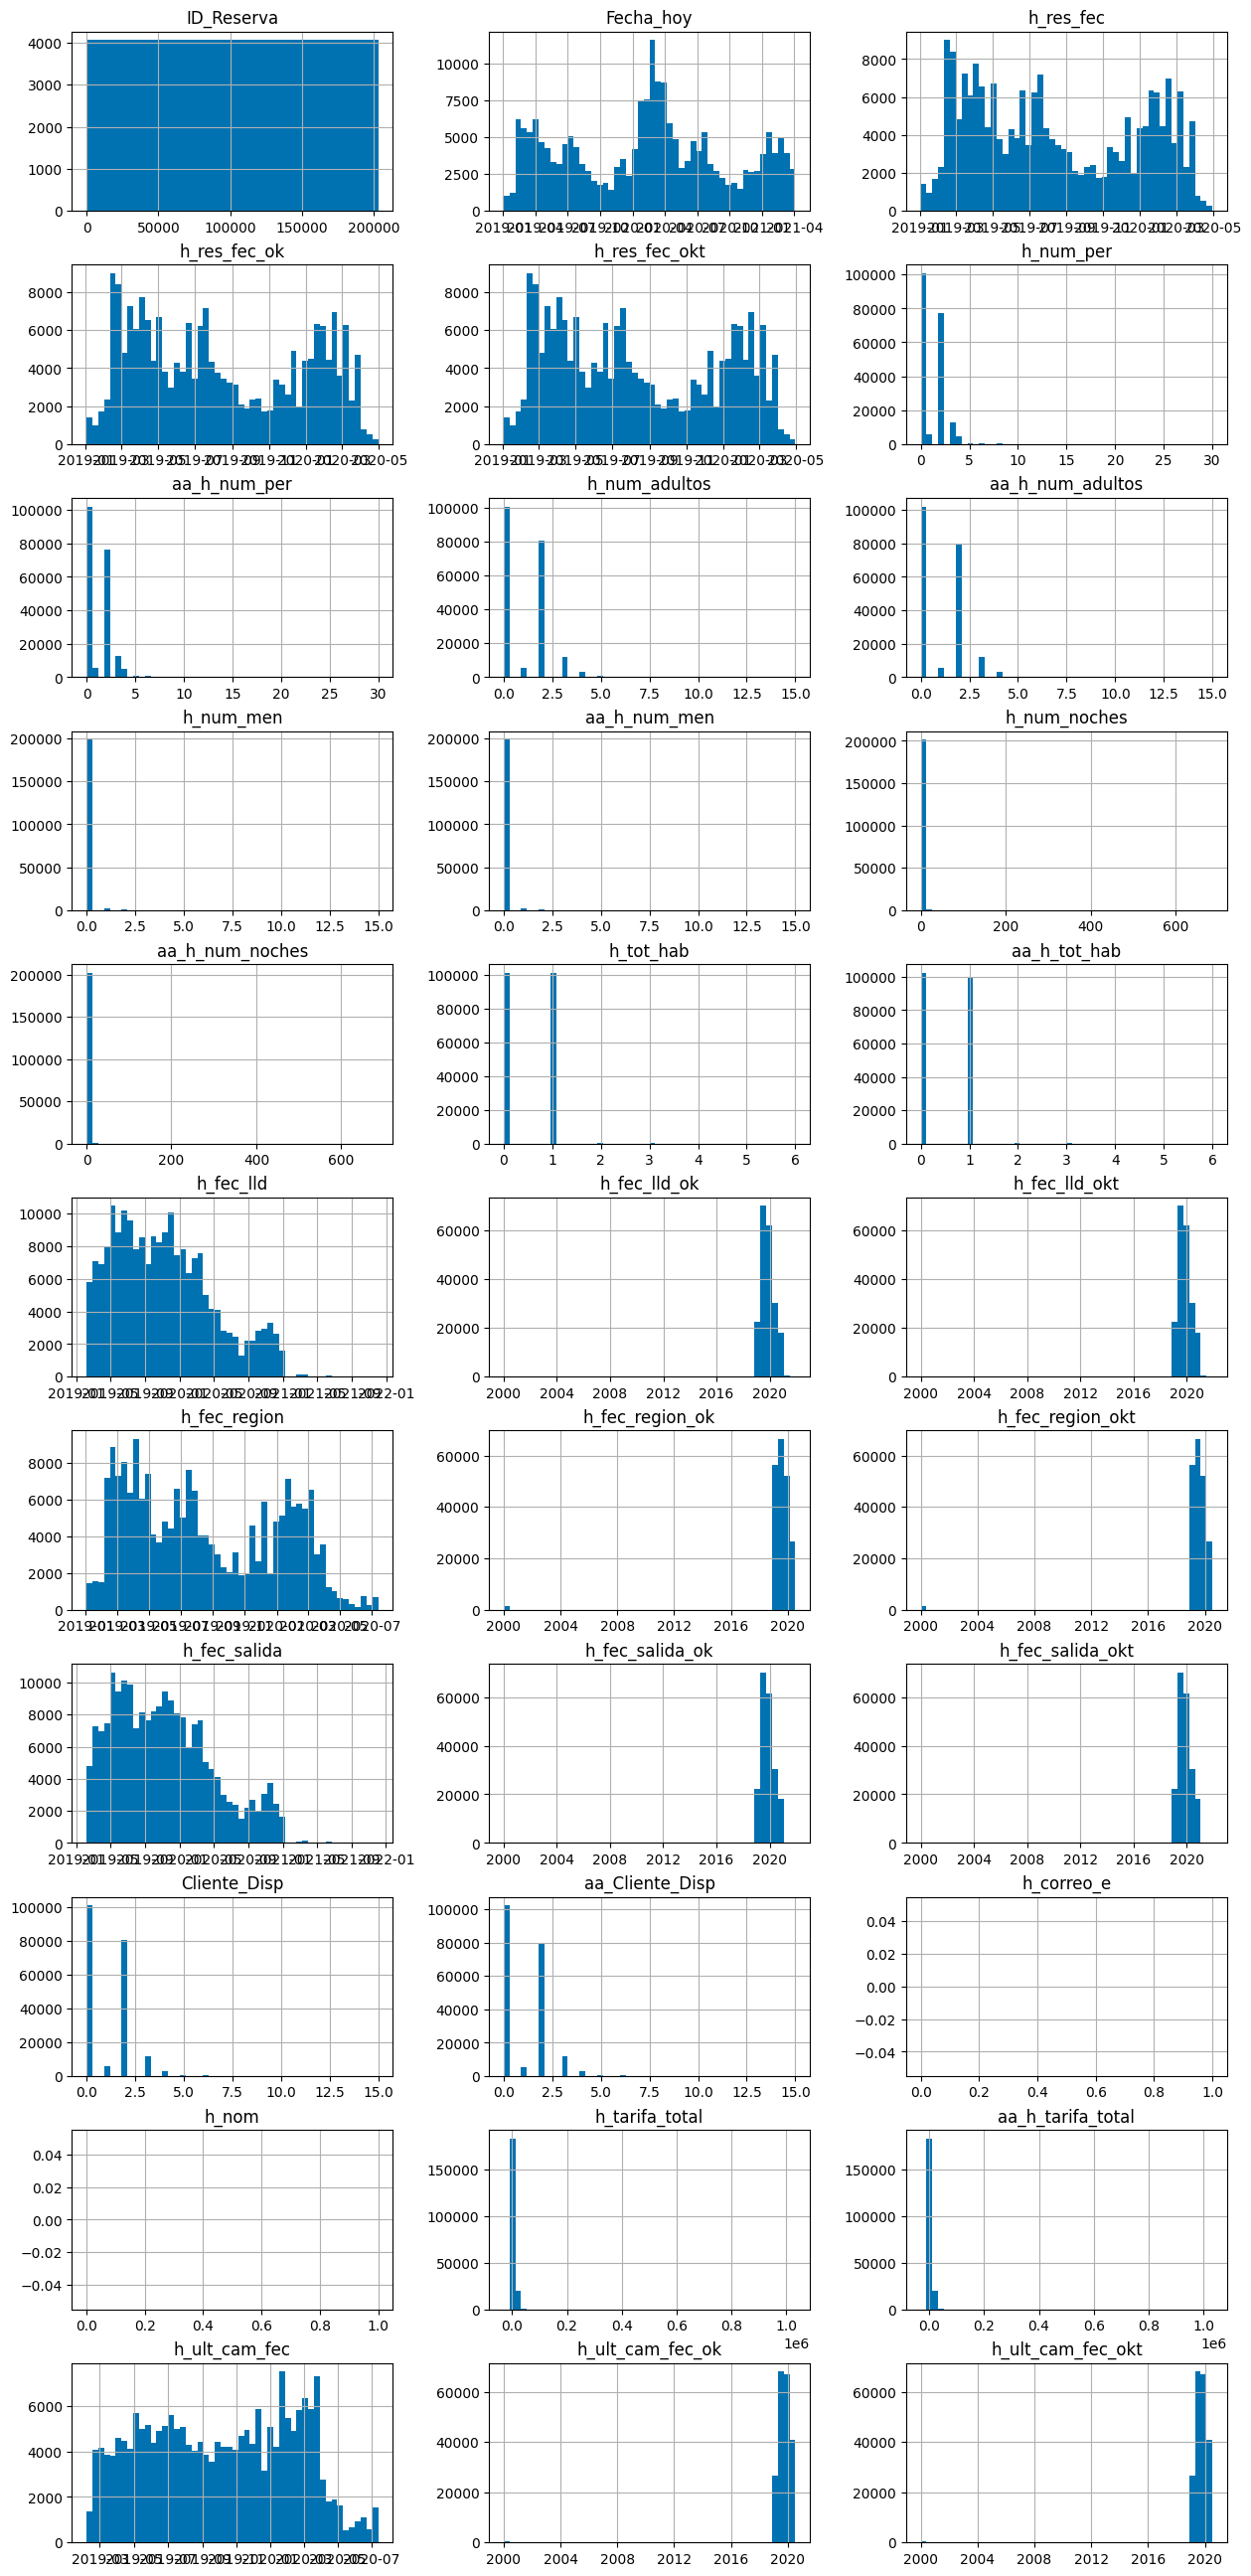

In [22]:
plt.style.use('seaborn-v0_8-colorblind')
df.hist(figsize=(15,45),histtype='stepfilled',layout=(15,3),bins=50)
plt.show()

In [23]:
# Verificar valores nulos 
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

h_fec_lld             2
h_fec_region       1550
h_fec_salida         34
h_correo_e       203002
h_nom            203002
h_ult_cam_fec       533
dtype: int64


In [24]:
# Eliminar columnas con valores nulos
df = df.drop(columns=['h_correo_e', 'h_nom'])

In [25]:
# Eliminar filas con valores nulos
df = df.dropna()

In [26]:
# Total de valores faltantes
print(df.isnull().sum().sum())  

0


Reemplazamos los campos vacíos (con solo espacios) por valores nulos para mayor control

In [27]:
# Convertir valores con espacios en blanco en NaN
df = df.replace(r'^\s*$', pd.NA, regex=True)

In [28]:
# Nuevos valores nulos
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

h_cod_reserva    127612
h_edo                 2
h_codigop         55742
dtype: int64


In [29]:
# Eliminar columnas con gran numero de valores nulos
df = df.drop(columns=['h_cod_reserva', 'h_codigop'])

In [30]:
# Eliminar filas con valores nulos
df = df.dropna()

## Identificación de Filas Duplicadas

In [31]:
# Verificar y eliminar filas duplicadas
duplicados = df.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")
df = df.drop_duplicates()


Número de filas duplicadas: 0


In [32]:
# Nuevas dimensiones del dataset
df.shape

(201412, 45)

## Identificación de Outliers

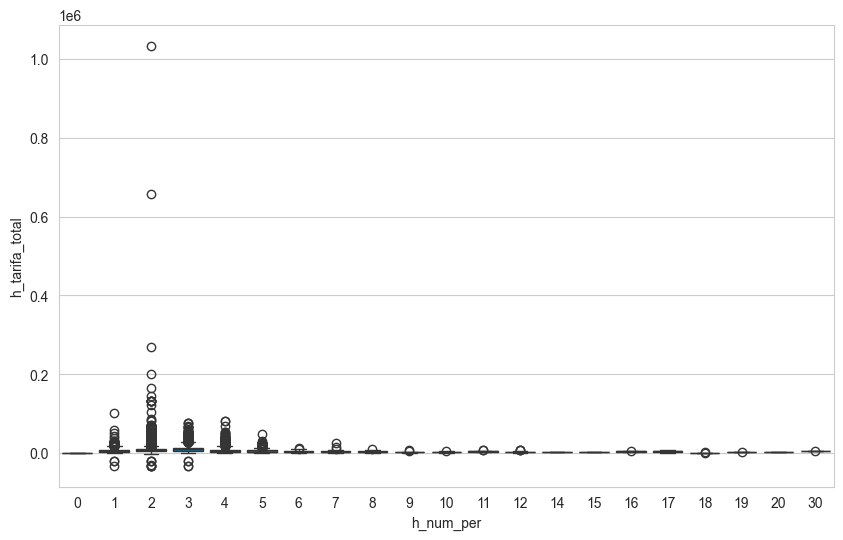

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'h_num_per', y = 'h_tarifa_total', data = df)
plt.show()

<Figure size 1000x300 with 0 Axes>

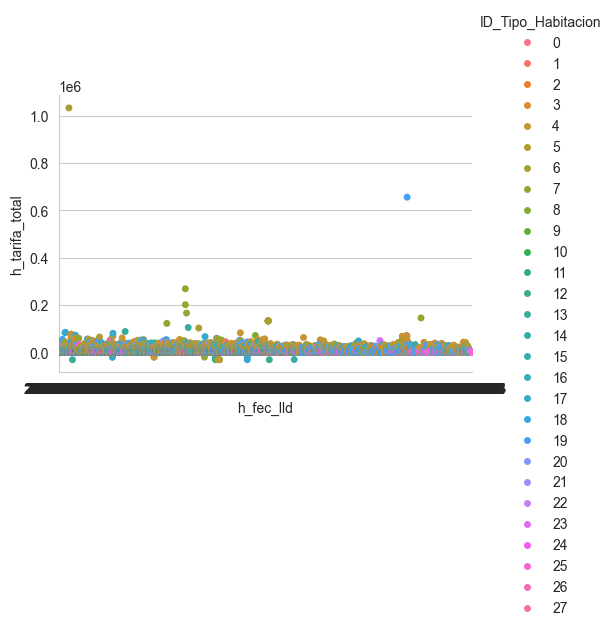

In [34]:
plt.figure(figsize=(10, 3))
sns.catplot(data=df, x='h_fec_lld', y='h_tarifa_total', hue = 'ID_Tipo_Habitacion')

### Análisis de variables desbalanceadas

In [35]:
# Lista para resultados
results = []

for column in df.select_dtypes(include=['int', 'float']).columns:
    skewness = stats.skew(df[column])
    kurtosis = stats.kurtosis(df[column])

    # Sesgo
    if abs(skewness) < 0.5:
        skewness_level = "Bajo"
    elif abs(skewness) < 1:
        skewness_level = "Moderado"
    else:
        skewness_level = "Alto"

    # Curtosis
    if abs(kurtosis) < 1:
        kurtosis_level = "Mesocúrtica"
    elif kurtosis > 1:
        kurtosis_level = "Leptocúrtica"
    else:
        kurtosis_level = "Platicúrtica"

    results.append({
        'Columna': column,
        'Skew': round(skewness, 4),
        'Sesgo': skewness_level,
        'Kurtosis': round(kurtosis, 4),
        'Curtosis': kurtosis_level
    })

# DataFrame
sesgo_df = pd.DataFrame(results)

# Resultados
sesgo_df.head(14)


,Columna,Skew,Sesgo,Kurtosis,Curtosis
0,ID_Reserva,0.0003,Bajo,-1.2004,Platicúrtica
1,h_num_per,1.8524,Alto,19.2988,Leptocúrtica
2,aa_h_num_per,1.8619,Alto,19.3618,Leptocúrtica
3,h_num_adultos,1.0609,Alto,4.3739,Leptocúrtica
4,aa_h_num_adultos,1.0628,Alto,4.2391,Leptocúrtica
5,h_num_men,16.4259,Alto,604.2444,Leptocúrtica
6,aa_h_num_men,16.5828,Alto,614.5634,Leptocúrtica
7,h_num_noches,88.5019,Alto,16996.8986,Leptocúrtica
8,aa_h_num_noches,82.3390,Alto,17616.8252,Leptocúrtica
9,h_tot_hab,0.1306,Bajo,-1.2340,Platicúrtica


In [36]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('clean_reservaciones.csv')

## Pandas Data Profiling 
Aplicamos nuevamente esta herramienta después de realizar el análisis

In [96]:
profile_report = ProfileReport(df, title="Profiling Report Clean")
profile_report.to_file("Profile_report_clean.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 30.83it/s]
